In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
data_train = pd.read_csv("/home/fish/Desktop/houseprice/input/train.csv")

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

In [14]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [15]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

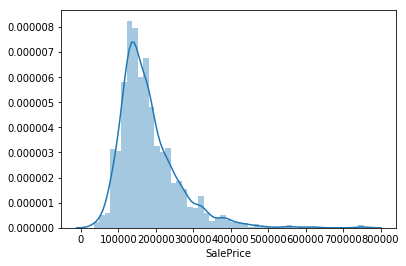

In [16]:
sns.distplot(data_train['SalePrice'])

In [17]:
print("Skewness:%f"% data_train['SalePrice'].skew())
print("Kurtosis:%f"% data_train['SalePrice'].kurt())

Skewness:1.882876
Kurtosis:6.536282


(-0.5, 1.5, 0, 800000)

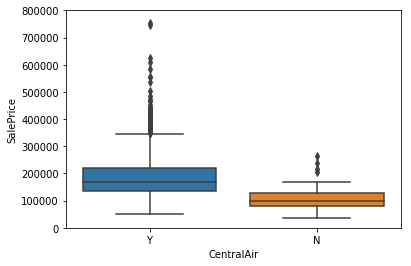

In [18]:
var = 'CentralAir'
data = pd.concat([data_train['SalePrice'],data_train[var]],axis = 1)
fig = sns.boxplot(x = var,y = "SalePrice",data = data)
fig.axis(ymin = 0,ymax = 800000)

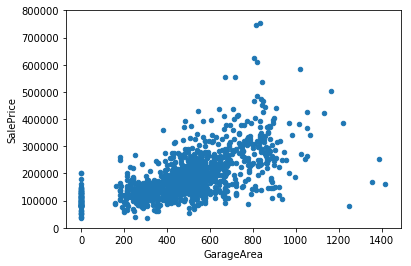

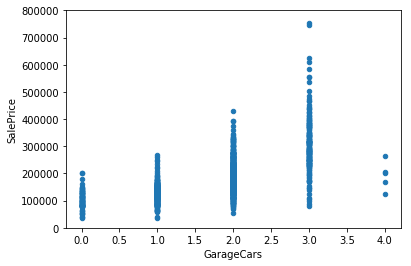

In [19]:
var  = ['GarageArea', 'GarageCars']
for index in range(2):
    data = pd.concat([data_train['SalePrice'], data_train[var[index]]], axis=1)
    data.plot.scatter(x=var[index], y='SalePrice', ylim=(0, 800000))

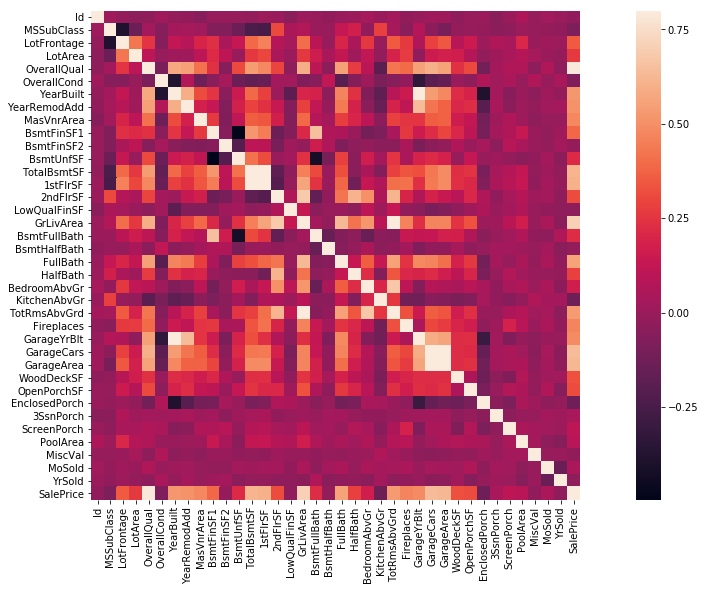

In [20]:
corrmat = data_train.corr()
f,ax = plt.subplots(figsize = (20,9))
sns.heatmap(corrmat,vmax=0.8,square=True)

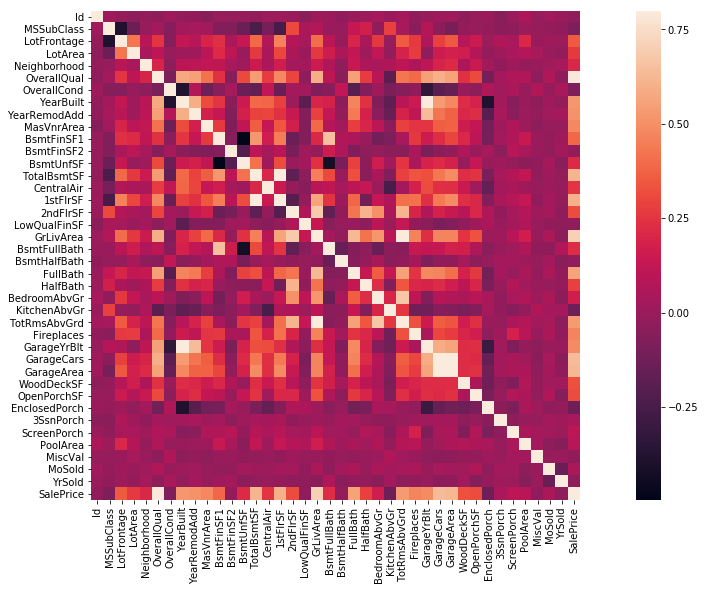

In [22]:
from sklearn import preprocessing
f_names = ['CentralAir','Neighborhood']
for x in f_names:
    label = preprocessing.LabelEncoder()
    data_train[x] = label.fit_transform(data_train[x])
corrmat = data_train.corr()
f,ax= plt.subplots(figsize = (20,9))
sns.heatmap(corrmat,vmax=0.8,square=True)

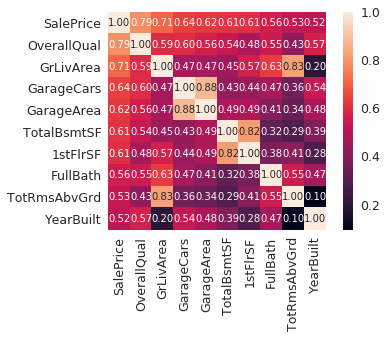

In [28]:
k = 10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

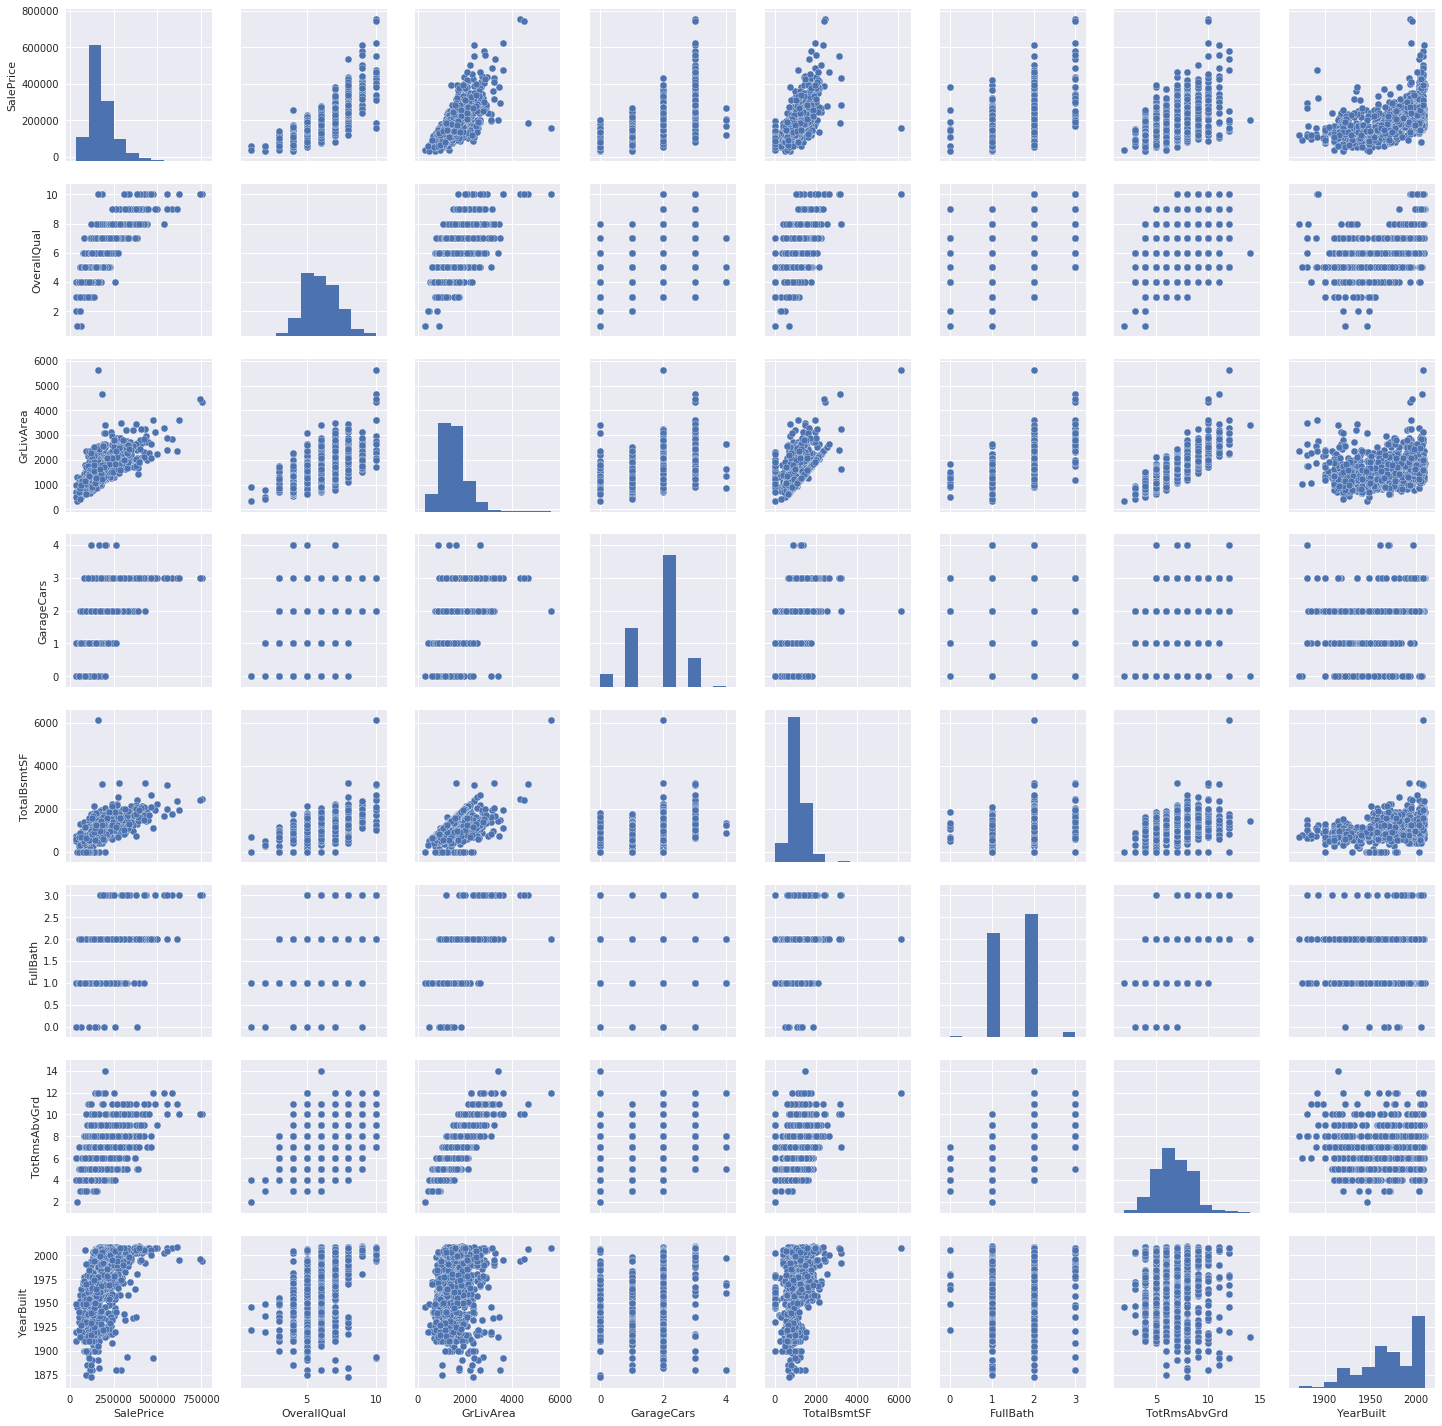

In [29]:
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(data_train[cols],size=2.5)
plt.show()

In [30]:
from sklearn import preprocessing
from sklearn import svm,linear_model,gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
import numpy as np

In [31]:
cols = ['SalePrice','OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
x = data_train[cols].values
y = data_train['SalePrice'].values
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y_scaled,test_size=0.33,random_state=42)

In [35]:
clfs = {
    'svm':svm.SVR(),
    'RandomForestRegressorm':RandomForestRegressor(n_estimators=400),
    'BayesianRige':linear_model.BayesianRidge()
}
for clf in clfs:
    try:
        clfs[clf].fit(X_train,y_train)
        y_pred = clfs[clf].predict(X_test)
        print(clf+" cost:"+str(np.sum(y_pred-y_test)/len(y_pred)))
    except Exception as e:
        print(clf+"Error:")
        print(str(e))

svm cost:-18.699401807505232
RandomForestRegressorm cost:-4.378809600322317
BayesianRige cost:-1.2587552908718629e-09


In [36]:
cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
x = data_train[cols].values
y = data_train['SalePrice'].values
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)
clf = RandomForestRegressor(n_estimators=400)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred)
rfr = clf

[141563.375      307574.7725     124708.8125     172047.
 308079.315       78560.625      190497.875      152162.7375
  78338.75       115378.125      161482.35       122349.75
  93316.25       222141.005      190159.35       122961.5625
 193546.25       131567.0625     119142.76       197012.2875
 161827.32       220180.86333333 169496.8225     125376.04583333
 187389.475      167418.19416667 202502.8275      97265.75
 188047.25       205984.7525     109618.5        233703.495
 180795.         109928.10833333 256376.9975     142120.6875
 158584.3425     206052.4125     308760.115      107030.125
 133193.         231326.7375     118968.775      370682.83
 137292.525      164717.735      125002.98214286 115701.54166667
 439669.86       145931.6825     118817.97916667 186074.75
 124104.05583333 344527.3125     144202.35198413 242594.405
 197983.4375     154334.75       151604.         103214.5
  82606.25       140021.875      312558.4        298986.0275
 263861.62       232482.825      1

In [37]:
y_test

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

In [38]:
sum(abs(y_pred-y_test))/len(y_pred)

19643.537310783424

In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

rfr = clf
data_test = pd.read_csv("./input/test.csv")

In [43]:
data_test[cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
TotalBsmtSF     1
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [44]:
data_test['GarageCars'].describe()

count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [45]:
data_test['TotalBsmtSF'].describe()

count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

In [48]:
cols2 = ['OverallQual','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
cars = data_test['GarageCars'].fillna(1.766118)
bsmt = data_test['TotalBsmtSF'].fillna(1046.117970)
data_test_x = pd.concat([data_test[cols2],cars,bsmt],axis=1)
data_test_x.isnull().sum()

OverallQual     0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
GarageCars      0
TotalBsmtSF     0
dtype: int64

In [49]:
x = data_test_x.values
y_te_pred = rfr.predict(x)
print(y_te_pred)
print(y_te_pred.shape)
print(x.shape)

[ 95832.135   107311.755   135836.5475  ... 101544.06125  96692.26
 175671.7325 ]
(1459,)
(1459, 7)


In [51]:
prediction = pd.DataFrame(y_te_pred,columns=['SalePrice'])
result = pd.concat([data_test['Id'],prediction],axis=1)
result.columns

Index(['Id', 'SalePrice'], dtype='object')

In [52]:
result.to_csv('./prediction.csv',index=False)